## Final Model

I decided to use Model 3 from the pre-processing notebook since that fits closer to my problem statement than any of the other models.

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures 
from sklearn import metrics


import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [63]:
train = pd.read_csv('../datasets/train.csv')

kaggle = pd.read_csv('../datasets/test 2.csv')

train.head()

,id,pid,ms_subclass,ms_zoning,lot_frontage,lot_area,street,lot_shape,land_contour,utilities,...,square_footage,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,kitchen_qual_Ex,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA
0,109,533352170,60,RL,0.0,13517,Pave,IR1,Lvl,AllPub,...,2204.0,1,0,0,0,0,0,0,1,0
1,544,531379050,60,RL,43.0,11492,Pave,IR1,Lvl,AllPub,...,3035.0,1,0,0,0,0,0,0,1,0
2,153,535304180,20,RL,68.0,7922,Pave,Reg,Lvl,AllPub,...,2114.0,1,0,0,0,0,0,0,1,0
3,318,916386060,60,RL,73.0,9802,Pave,Reg,Lvl,AllPub,...,1828.0,1,0,0,0,0,0,0,0,1
4,255,906425045,50,RL,82.0,14235,Pave,IR1,Lvl,AllPub,...,2121.0,1,0,0,0,0,0,0,0,1


In [35]:
X = train[['year_built', 'overall_cond', 'overall_qual', 'full_bath', 'garage_area', 'square_footage', 'bldg_type_1Fam',  'bldg_type_2fmCon', 'bldg_type_Duplex', 'bldg_type_Twnhs', 'bldg_type_TwnhsE', 'kitchen_qual_Ex', 'kitchen_qual_Fa', 'kitchen_qual_Gd', 'kitchen_qual_TA']]

y = train['saleprice']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 44)

In [37]:
y.mean()

181534.626159102

***Saleprice Mean***

$181,534.63

In [38]:
lr = LinearRegression()

In [39]:
cross_val_score(lr, X_train, y_train).mean()

0.7974105396449154

In [40]:
lr.fit(X,y)

LinearRegression()

In [41]:
lr.coef_

array([ 4.31484556e+02,  4.90830268e+03,  1.57460038e+04,  5.69074026e+03,
        4.43500148e+01,  3.35828689e+01,  1.28084698e+04,  9.64223854e+03,
       -6.01233602e+03, -1.20882857e+04, -4.35008664e+03,  4.54884768e+04,
       -1.31855816e+04, -1.22040694e+04, -2.00988258e+04])

In [42]:
pd.DataFrame(lr.coef_, index = X.columns,)

,0
year_built,431.484556
overall_cond,4908.302682
overall_qual,15746.003843
full_bath,5690.740262
garage_area,44.350015
square_footage,33.582869
bldg_type_1Fam,12808.469777
bldg_type_2fmCon,9642.238539
bldg_type_Duplex,-6012.336020
bldg_type_Twnhs,-12088.285660


## Coefficient interpretation

#comparison to whatever one was dropped.

For every 1 unit increase in the features listed above we expect an increase or decrease to the salesprice from the average. The features that would most effect the price are listed below.

Excellent kitchen gave an increase of $45,488.48 from the kitchen type column. 

A one family building type gave an increase $12,808.47 from the building type column. 
 
Overall quality $15,746.00 per unit increase from the scale of 1-8. 

Overall condition had a lesser increase at $4908.30 per unit increase from a scale of 1-8.

To add a full bathroom that would cost you $5690.74 per unit.

Garage area per square footage ($44.35) per unit.

House square footage($33.58) per unit.

The difference between the two is $10.77 per square foot so interestingly enough garage area is more expensive than house footage. 

***Decrease features***

The things that would DECREASE the price the most would be a TA quality kitchen making it decrease in price $20,098 per unit from kitchen types.

Townhouse building type would decrease the price $12,088.29 per unit in building types.

In [43]:
print(f'Training R2: {lr.score(X_train, y_train)}')
print(f'Test R2: {lr.score(X_test, y_test)}')

Training R2: 0.810575131309756
Test R2: 0.8510727952352909


In [44]:
pred = lr.predict(X_test)

print(f'MSE: {mean_squared_error(y_test, pred)}')
print(f'RMSE: {mean_squared_error(y_test, pred, squared = False)}')

MSE: 1008671877.8111094
RMSE: 31759.59505111974


In [45]:
y_train.mean()

180926.40494791666

In [46]:
len(y_train)

1536

***Baseline Score***

In [47]:
preds = np.repeat(y_train.mean(), 1536)
preds

array([180926.40494792, 180926.40494792, 180926.40494792, ...,
       180926.40494792, 180926.40494792, 180926.40494792])

In [48]:
r2_score(y_train, preds)


#The baseline score is correct due to us setting the training score to the predicted true value and mean of $180,926.40. 

0.0

## LINEM

In [49]:
pred = lr.predict(X)

In [50]:
metrics.r2_score(y, pred)

0.8215446315254538

In [51]:
#MSE
metrics.mean_squared_error(y, pred)

1120595574.6101694

Text(0, 0.5, 'Sale Price')

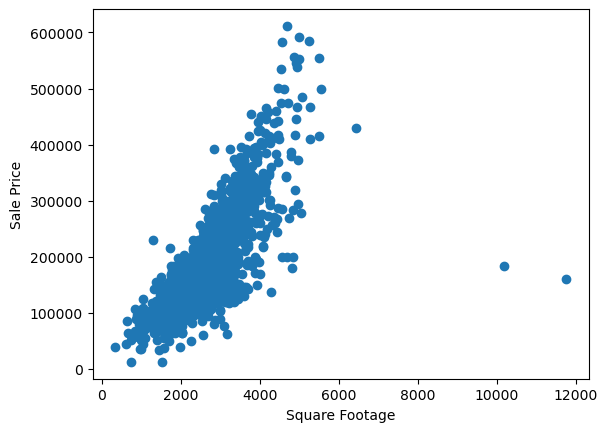

In [52]:
#Linear relationship - passes since the plots are in an even trend going forward with increase of price.

plt.scatter(X['square_footage'], y);
plt.xlabel('Square Footage')
plt.ylabel('Sale Price')

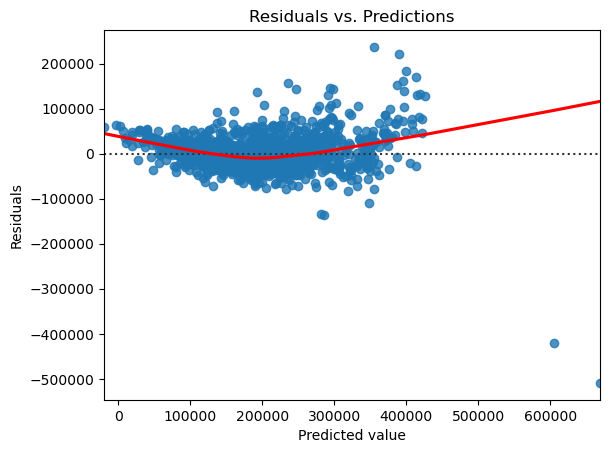

In [75]:
#Indepedent errors

# Close to but not fully meets since there is not a wide spread of the data points along the line. This is showing more a more heteroscedastic model.

sns.residplot(x = pred,
             y = resid,
             lowess = True,
             line_kws = dict(color = 'red'))\
    .set(title = "Residuals vs. Predictions",
        xlabel = 'Predicted value',
        ylabel = 'Residuals');


plt.savefig('../images/imageresidvpred.png', bbox_inches = 'tight')

Text(0, 0.5, 'Frequency')

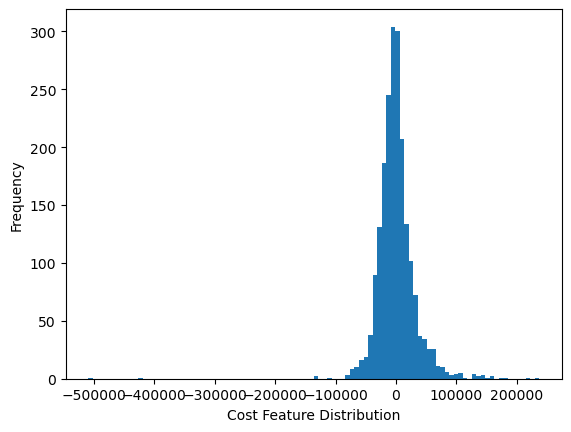

In [54]:
# Normally distributed errors-  #Really close to the passing distribution ideal.
resid = y - pred

plt.hist(resid, bins = 100);
plt.xlabel('Cost Feature Distribution')
plt.ylabel('Frequency')

Text(0, 0.5, 'Residuals')

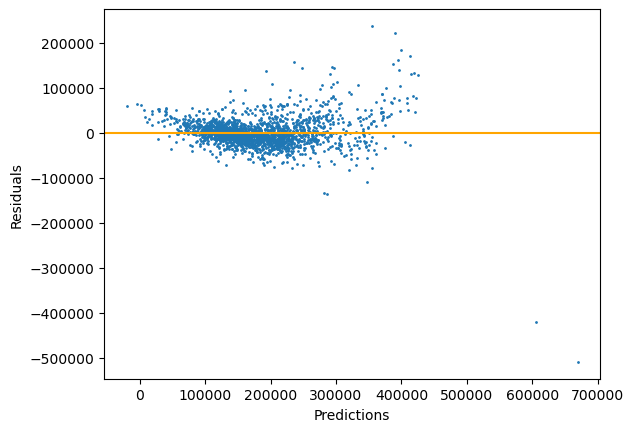

In [55]:
#Equal variance of errors - not showing much randomness so fails this assumption.


plt.scatter(pred, resid, s = 1)
plt.axhline(0, color = 'orange');
plt.xlabel('Predictions')
plt.ylabel('Residuals')

In [56]:
#No multicollinearity/ independence of Predictors
X.corr()

,year_built,overall_cond,overall_qual,full_bath,garage_area,square_footage,bldg_type_1Fam,bldg_type_2fmCon,bldg_type_Duplex,bldg_type_Twnhs,bldg_type_TwnhsE,kitchen_qual_Ex,kitchen_qual_Fa,kitchen_qual_Gd,kitchen_qual_TA
year_built,1.000000,-0.370603,0.602635,0.480929,0.486986,0.387587,-0.127400,-0.180587,-0.021964,0.074235,0.243377,0.227757,-0.196291,0.429396,-0.479772
overall_cond,-0.370603,1.000000,-0.081771,-0.218860,-0.137431,-0.155435,0.150144,-0.002439,-0.099069,-0.009129,-0.133638,-0.058780,-0.066066,-0.023353,0.073323
overall_qual,0.602635,-0.081771,1.000000,0.515179,0.563578,0.654338,-0.005530,-0.136873,-0.144980,-0.007299,0.189175,0.446570,-0.197444,0.403363,-0.568358
full_bath,0.480929,-0.218860,0.515179,1.000000,0.397986,0.561770,-0.114036,-0.015347,0.145275,-0.009052,0.072810,0.196661,-0.089847,0.335221,-0.403389
garage_area,0.486986,-0.137431,0.563578,0.397986,1.000000,0.574168,0.097311,-0.113200,-0.042789,-0.103860,0.025554,0.318499,-0.188903,0.263441,-0.367275
square_footage,0.387587,-0.155435,0.654338,0.561770,0.574168,1.000000,0.080044,-0.044267,0.013755,-0.136670,-0.005685,0.408240,-0.108051,0.235128,-0.410731
bldg_type_1Fam,-0.127400,0.150144,-0.005530,-0.114036,0.097311,0.080044,1.000000,-0.333314,-0.428719,-0.410589,-0.642284,0.004297,0.000443,0.018298,-0.020255
bldg_type_2fmCon,-0.180587,-0.002439,-0.136873,-0.015347,-0.113200,-0.044267,-0.333314,1.000000,-0.029539,-0.028290,-0.044254,-0.042744,0.108817,-0.108415,0.095674
bldg_type_Duplex,-0.021964,-0.099069,-0.144980,0.145275,-0.042789,0.013755,-0.428719,-0.029539,1.000000,-0.036387,-0.056921,-0.054979,0.004855,-0.140835,0.164877
bldg_type_Twnhs,0.074235,-0.009129,-0.007299,-0.009052,-0.103860,-0.136670,-0.410589,-0.028290,-0.036387,1.000000,-0.054513,-0.052654,-0.028603,-0.006140,0.042085


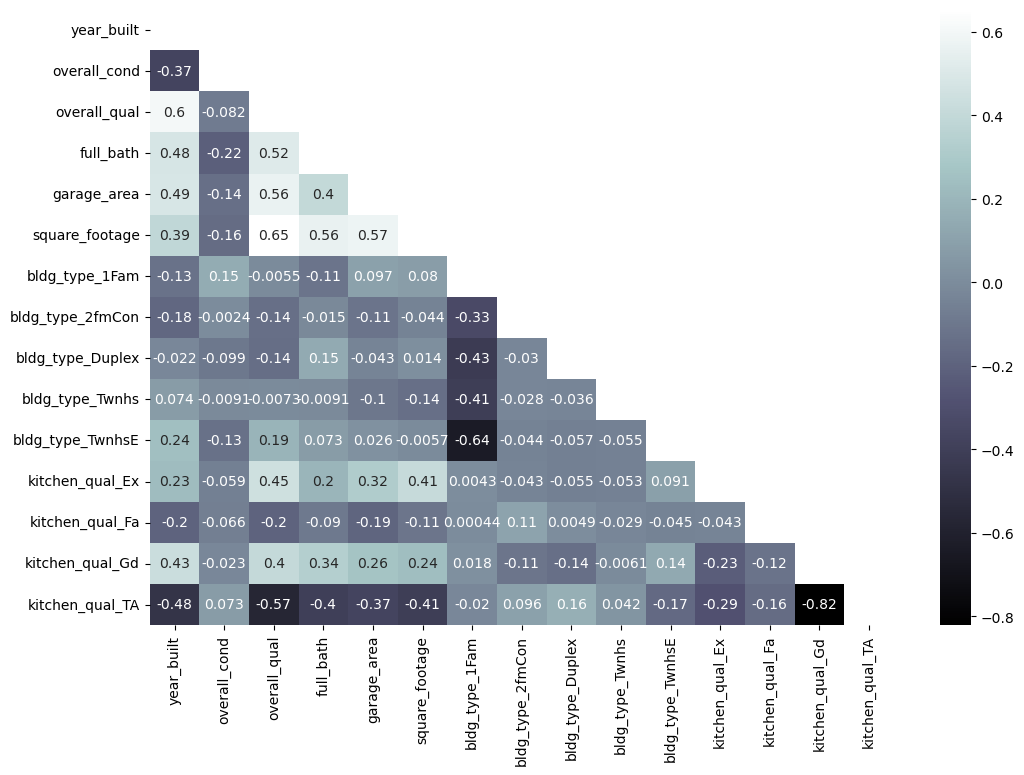

In [57]:
plt.figure(figsize = (12,8))

mask = np.zeros_like(X.corr())

mask[np.triu_indices_from(mask)] = True

sns.heatmap(X.corr(),
           cmap = 'bone',
           mask = mask,
           annot = True);

# Half way meets multicollinearity since the majority of the X variables are not perfectly correlated with one another showing some can be totally independent.

In [58]:
#pd.set_option('display.max_columns', None)

#print(train)

## Other useful graphs for tying up my problem statement.

In [59]:
style = pd.get_dummies(train, columns = ['house_style'])

print(style)

        id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0      109  533352170           60        RL           0.0     13517   Pave   
1      544  531379050           60        RL          43.0     11492   Pave   
2      153  535304180           20        RL          68.0      7922   Pave   
3      318  916386060           60        RL          73.0      9802   Pave   
4      255  906425045           50        RL          82.0     14235   Pave   
...    ...        ...          ...       ...           ...       ...    ...   
2044  1587  921126030           20        RL          79.0     11449   Pave   
2045   785  905377130           30        RL           0.0     12342   Pave   
2046   916  909253010           50        RL          57.0      7558   Pave   
2047   639  535179160           20        RL          80.0     10400   Pave   
2048    10  527162130           60        RL          60.0      7500   Pave   

     lot_shape land_contour utilities  ... kitchen_

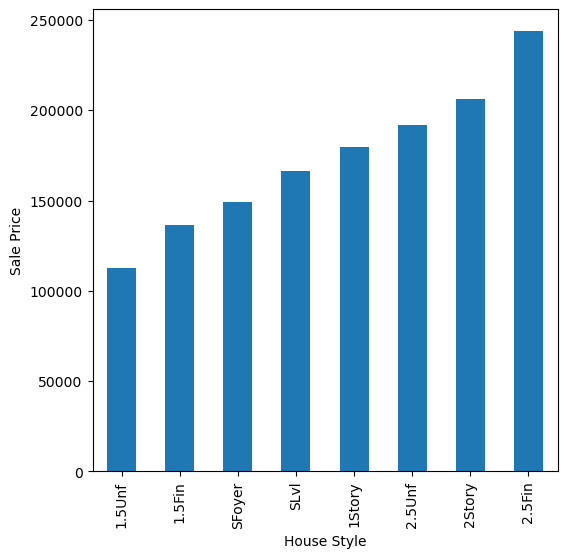

In [69]:
style_mean = train.groupby('house_style')['saleprice'].mean().sort_values()
plt.figure(figsize = (6,6))
style_mean.plot(kind = 'bar')
plt.ylabel('Sale Price')
plt.xlabel('House Style')

plt.savefig('../images/image2.png', bbox_inches = 'tight')

#Graph showing house style in relation to price for an easy beginning comparison for my problem statement.

In [61]:
neigh = pd.get_dummies(train, columns = ['neighborhood'])

print(style)

        id        pid  ms_subclass ms_zoning  lot_frontage  lot_area street  \
0      109  533352170           60        RL           0.0     13517   Pave   
1      544  531379050           60        RL          43.0     11492   Pave   
2      153  535304180           20        RL          68.0      7922   Pave   
3      318  916386060           60        RL          73.0      9802   Pave   
4      255  906425045           50        RL          82.0     14235   Pave   
...    ...        ...          ...       ...           ...       ...    ...   
2044  1587  921126030           20        RL          79.0     11449   Pave   
2045   785  905377130           30        RL           0.0     12342   Pave   
2046   916  909253010           50        RL          57.0      7558   Pave   
2047   639  535179160           20        RL          80.0     10400   Pave   
2048    10  527162130           60        RL          60.0      7500   Pave   

     lot_shape land_contour utilities  ... kitchen_

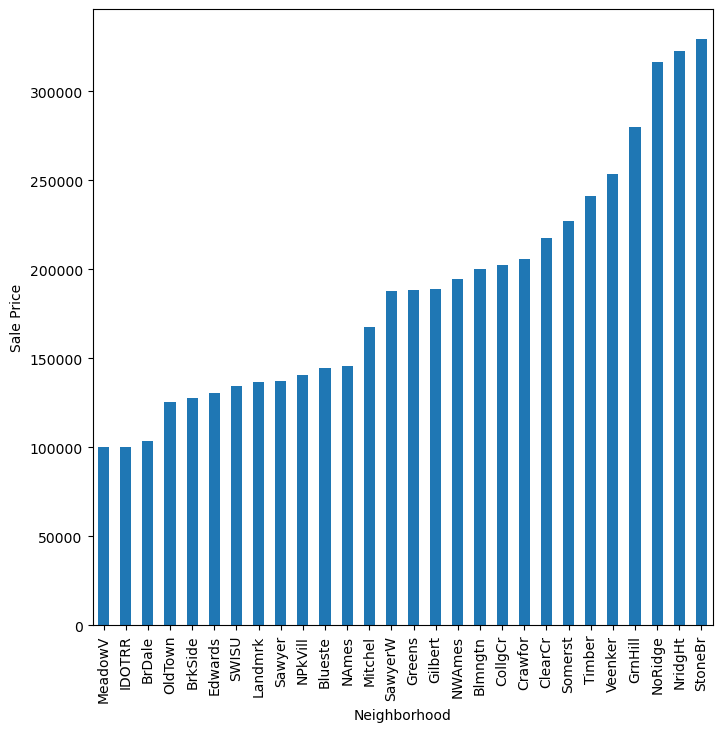

In [71]:
neigh_mean = train.groupby('neighborhood')['saleprice'].mean().sort_values()
plt.figure(figsize = (8,8))
neigh_mean.plot(kind = 'bar')
plt.ylabel('Sale Price')
plt.xlabel('Neighborhood')

plt.savefig('../images/imageneigh.png', bbox_inches = 'tight')

#graph going over the difference in price for neighborhoods for another good example in my problem statement.

## Conclusion and Recommendations